# TEAM KANYE WESTERN BLOT PRESENTS:

## Live interactive python sessions

### Permalink:    http://mybinder.org/repo/Kanye-western-blot/genome-assembly/
### View on github: https://github.com/Kanye-western-blot/genome-assembly/blob/master/index.ipynb
<hr>

In [44]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import re

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

%matplotlib inline

In [3]:
im1 = mpimg.imread('img/Kanye-West.jpg')
im2 = mpimg.imread('img/Western-Blot.png')

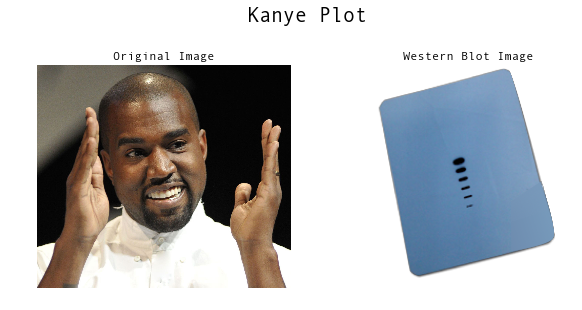

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False)
fig.suptitle("Kanye Plot", fontsize=20, y=1.10)
ax1.axis("off"); ax2.axis("off");
ax1.imshow(im1)
ax1.set_title("Original Image", fontsize=12)
ax2.imshow(im2)
ax2.set_title("Western Blot Image", fontsize=12)

In [9]:
filenames = ['Genome-%d-IS-Analysis.csv' %(i) for i in range(1,4)]
datadir = 'data/'
# print filenames
df = pd.read_csv(datadir + filenames[0])
df[:3]

,Sequences,IS Family,Group,Origin,Score,E
0,ISAcma2,ISAs1,NaN,Acaryochloris marina,50,0.023
1,ISAba30,IS200/IS605,NaN,Acinetobacter baumannii,52,0.006
2,ISAba22,IS3,IS3,Acinetobacter baumannii,50,0.023


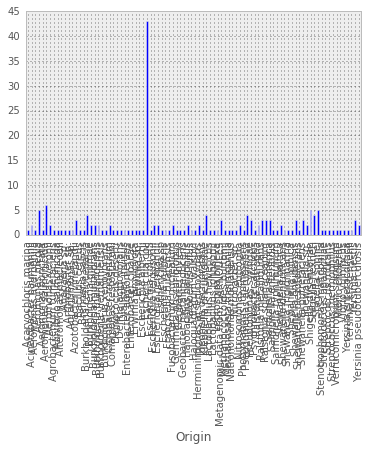

In [46]:
origin_counts = df.groupby('Origin').size()
origin_counts.plot(kind='bar')

In [29]:
dataDic = {}
for name in df['Origin']:
    if name in dataDic:
        dataDic[name] += 1
    else:
        dataDic[name] = 1

In [34]:
def nbest(datadic, N = None):
    tups = datadic.items()
    tups = sorted(tups, key = lambda x: x[1], reverse = True)
    if N:
        return tups[:N]
    else:
        return tups

In [35]:
nbest(dataDic, 10)

[('Escherichia coli', 43),
 ('Aeromonas salmonicida', 6),
 ('Aeromonas media', 5),
 ('Shigella sonnei', 5),
 ('Shigella dysenteriae', 5),
 ('Klebsiella pneumoniae', 4),
 ('Burkholderia cenocepacia', 4),
 ('Shigella flexneri', 4),
 ('Pseudomonas aeruginosa', 4),
 ('Azotobacter vinelandii', 3)]

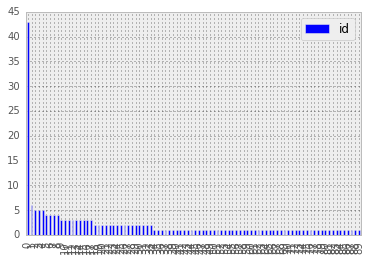

In [45]:
n = None
names, vals = zip(*nbest(dataDic, n))
names, vals = list(names), list(vals)
# print names
df2 = pd.DataFrame(vals, columns =['id'])
df2.plot(kind='bar')